# Vanilla Neural Network Classifier

Implementing from scratch Neural Network with Dropout and L2 regularization option, simple study case on breast cancer dataset. All functions used are coded from scratch.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import NN_functions as NN
import Sorelz_tools as ST

In [8]:
X=load_breast_cancer()["data"]
y=load_breast_cancer()["target"]

In [9]:
X_train,X_dev,y_train,y_dev=ST.scratch_split(X,y,test_pct=0.2,seed=26)

In [10]:
X_train,f_mean,f_std=ST.standardize_fit_transform(X_train)
X_dev=ST.standardize_transform(X_dev,f_mean,f_std)

In [11]:
#Reshape for the format (n_x,m)  n_x variables, m number of observations
X_train=X_train.T
X_dev=X_dev.T
y_train=y_train.reshape(1,X_train.shape[1])
y_dev=y_dev.reshape(1,X_dev.shape[1])

print ("Shape X_train: {}, Shape X_dev: {}".format(X_train.shape,X_dev.shape))
print ("Shape y_train: {}, Shape y_dev: {}".format(y_train.shape,y_dev.shape))

Shape X_train: (30, 456), Shape X_dev: (30, 113)
Shape y_train: (1, 456), Shape y_dev: (1, 113)


In [12]:
def Fitting(X,Y,layers,activation,learning_rate = 0.00175, num_iterations = 3000, print_cost=True,seed=10):
    """
    Implements a L-layer neural network
    """
    costs = []                         # keep track of cost
    
    params = NN.initialize_parameters_deep(layers,seed)
    for i in range(0, num_iterations):
        #forward prop
        AL, caches = NN.prop_forward(X,params,activation)
        cost = NN.compute_cost(AL,Y,params)

        #backward prop
        grads = NN.prop_backward(AL,Y,caches,activation)
 
        # Updating parameters
        params = NN.update_parameters(params,grads,learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 500 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        costs.append(cost)
    
    return params,costs

In [13]:
lr=0.001
activation="relu"
final_params,cost=Fitting(X_train,y_train,[X_train.shape[0],15,4,1],activation,learning_rate=lr,num_iterations=10000)

4 Layers parameters init
Cost after iteration 0: 0.824385
Cost after iteration 500: 0.113351
Cost after iteration 1000: 0.084111
Cost after iteration 1500: 0.069561
Cost after iteration 2000: 0.059449
Cost after iteration 2500: 0.052110
Cost after iteration 3000: 0.046218
Cost after iteration 3500: 0.040821
Cost after iteration 4000: 0.035957
Cost after iteration 4500: 0.031891
Cost after iteration 5000: 0.028410
Cost after iteration 5500: 0.025359
Cost after iteration 6000: 0.022757
Cost after iteration 6500: 0.020466
Cost after iteration 7000: 0.018506
Cost after iteration 7500: 0.016838
Cost after iteration 8000: 0.015374
Cost after iteration 8500: 0.014101
Cost after iteration 9000: 0.012996
Cost after iteration 9500: 0.011976


In [14]:
def Predict(X_test,params):
    L=len(params)//2
    y_pred_prob=NN.prop_forward(X_test,params,activation)[0]
    y_pred_classes=y_pred_prob>0.5
    return(y_pred_prob,y_pred_classes)

In [15]:
y_pred_prob,y_pred_classes=Predict(X_dev,final_params)

In [19]:
mse_dev=NN.compute_cost(y_pred_prob,y_dev,final_params)
print("MSE on the dev set {}".format(np.squeeze(mse_dev)))

MSE on the dev set 0.1024875102990507


In [11]:
acc_dev=ST.accuracy(y_pred_classes,y_test)

0.96460176991150437

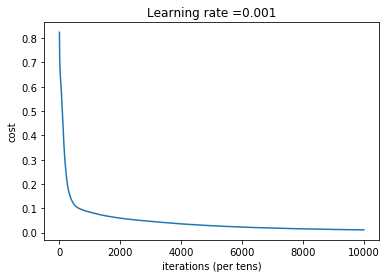

In [40]:
plt.plot(np.squeeze(cost))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(lr))
plt.show()